In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from models.MLP import MLP, plot_training

In [2]:
df_data = pd.read_csv('../data/train.csv')
df_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
X = df_data.iloc[:,2:].values
species = df_data['species'].unique()

# Creation of the one-hot vector for the targets matrix
t = np.zeros((len(X),species.size)) 
for i in range(species.size):
    t[df_data['species'] == species[i], i] = 1

In [4]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

## Training with a stochastic gradient descent

In [5]:
model = MLP(X_train, t_train, X_test, t_test, num_epochs=500)
model.set_model(input_size=X_train.shape[1], output_size=t_train.shape[1], activation_function='relu')
model.set_optimizer(optim='SGD', lr=1e-2, reg=0)

In [6]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.60664, Accuracy: 0.72%
Epoch 2/500, Loss: 4.59860, Accuracy: 1.30%
Epoch 3/500, Loss: 4.59339, Accuracy: 1.30%
Epoch 4/500, Loss: 4.58951, Accuracy: 1.30%
Epoch 5/500, Loss: 4.58661, Accuracy: 1.15%
Epoch 6/500, Loss: 4.58427, Accuracy: 1.15%
Epoch 7/500, Loss: 4.58227, Accuracy: 1.15%
Epoch 8/500, Loss: 4.58044, Accuracy: 1.15%
Epoch 9/500, Loss: 4.57859, Accuracy: 1.15%
Epoch 10/500, Loss: 4.57668, Accuracy: 1.15%
Epoch 11/500, Loss: 4.57448, Accuracy: 1.15%
Epoch 12/500, Loss: 4.57173, Accuracy: 1.30%
Epoch 13/500, Loss: 4.56818, Accuracy: 1.44%
Epoch 14/500, Loss: 4.56320, Accuracy: 2.16%
Epoch 15/500, Loss: 4.55587, Accuracy: 2.31%
Epoch 16/500, Loss: 4.54443, Accuracy: 3.03%
Epoch 17/500, Loss: 4.52527, Accuracy: 3.61%
Epoch 18/500, Loss: 4.49067, Accuracy: 3.90%
Epoch 19/500, Loss: 4.42630, Accuracy: 4.04%
Epoch 20/500, Loss: 4.31598, Accuracy: 4.04%
Epoch 21/500, Loss: 4.16805, Accuracy: 4.76%
Epoch 22/500, Loss: 4.00550, Accuracy: 6.20%
Epoch 23/500, Loss:

In [7]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 82.15% on test data


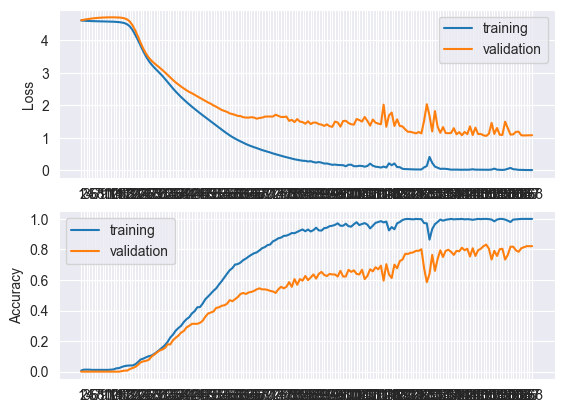

In [8]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)

### Add a regularization term

In [9]:
model.set_optimizer(optim='SGD', lr=1e-2, reg=1e-3)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.60566, Accuracy: 0.87%
Epoch 2/500, Loss: 4.59779, Accuracy: 1.15%
Epoch 3/500, Loss: 4.59294, Accuracy: 1.15%
Epoch 4/500, Loss: 4.58959, Accuracy: 1.01%
Epoch 5/500, Loss: 4.58704, Accuracy: 1.01%
Epoch 6/500, Loss: 4.58521, Accuracy: 1.15%
Epoch 7/500, Loss: 4.58369, Accuracy: 1.30%
Epoch 8/500, Loss: 4.58245, Accuracy: 1.15%
Epoch 9/500, Loss: 4.58137, Accuracy: 1.15%
Epoch 10/500, Loss: 4.58039, Accuracy: 1.15%
Epoch 11/500, Loss: 4.57945, Accuracy: 1.15%
Epoch 12/500, Loss: 4.57848, Accuracy: 1.30%
Epoch 13/500, Loss: 4.57747, Accuracy: 1.30%
Epoch 14/500, Loss: 4.57635, Accuracy: 1.15%
Epoch 15/500, Loss: 4.57505, Accuracy: 1.30%
Epoch 16/500, Loss: 4.57343, Accuracy: 1.59%
Epoch 17/500, Loss: 4.57135, Accuracy: 1.88%
Epoch 18/500, Loss: 4.56855, Accuracy: 1.88%
Epoch 19/500, Loss: 4.56444, Accuracy: 2.74%
Epoch 20/500, Loss: 4.55813, Accuracy: 2.89%
Epoch 21/500, Loss: 4.54793, Accuracy: 3.03%
Epoch 22/500, Loss: 4.53031, Accuracy: 3.03%
Epoch 23/500, Loss:

In [10]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 68.01% on test data


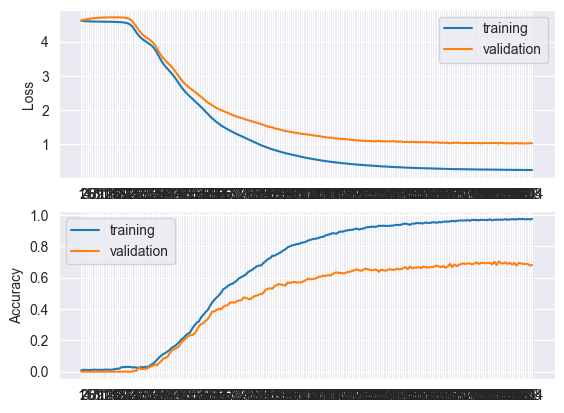

In [11]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)

## hyperparameters optimization

In [12]:
best_params, accuracy_historic = model.k_fold_cross_validation(X_train, t_train)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.007
K = 1, accuracy: 0.007
K = 2, accuracy: 0.014
K = 3, accuracy: 0.007
K = 4, accuracy: 0.000
Best val accuracy: 0.007 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.000
K = 1, accuracy: 0.007
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.014
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.000
K = 1, accuracy: 0.000
K = 2, accuracy: 0.014
K = 3, accuracy: 0.007
K = 4, accuracy: 0.000
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.007
K = 1, accuracy: 0.000
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.007
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.000
K = 1, accuracy: 0.014
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.007
testing parameters: learnin

<Axes: >

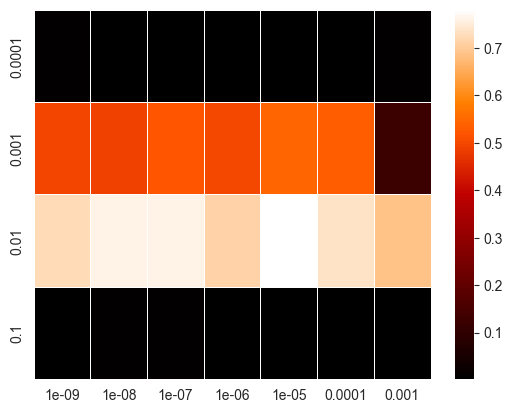

In [13]:
sns.heatmap(accuracy_historic, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3],     
                 yticklabels=[1e-4, 1e-3, 1e-2, 1e-1])

In [14]:
best_params

(0.01, 1e-05)

### Complet learning with the best hyperparameters

In [15]:
model.set_optimizer(optim='SGD', lr=best_params[0], reg=best_params[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.60625, Accuracy: 0.58%
Epoch 2/500, Loss: 4.59851, Accuracy: 0.87%
Epoch 3/500, Loss: 4.59326, Accuracy: 1.01%
Epoch 4/500, Loss: 4.58952, Accuracy: 1.01%
Epoch 5/500, Loss: 4.58669, Accuracy: 1.15%
Epoch 6/500, Loss: 4.58452, Accuracy: 1.15%
Epoch 7/500, Loss: 4.58266, Accuracy: 1.30%
Epoch 8/500, Loss: 4.58105, Accuracy: 1.30%
Epoch 9/500, Loss: 4.57951, Accuracy: 1.30%
Epoch 10/500, Loss: 4.57790, Accuracy: 1.30%
Epoch 11/500, Loss: 4.57614, Accuracy: 1.15%
Epoch 12/500, Loss: 4.57408, Accuracy: 1.30%
Epoch 13/500, Loss: 4.57160, Accuracy: 1.30%
Epoch 14/500, Loss: 4.56832, Accuracy: 1.73%
Epoch 15/500, Loss: 4.56390, Accuracy: 2.60%
Epoch 16/500, Loss: 4.55760, Accuracy: 2.89%
Epoch 17/500, Loss: 4.54811, Accuracy: 2.89%
Epoch 18/500, Loss: 4.53298, Accuracy: 4.33%
Epoch 19/500, Loss: 4.50763, Accuracy: 4.47%
Epoch 20/500, Loss: 4.46266, Accuracy: 4.18%
Epoch 21/500, Loss: 4.38452, Accuracy: 3.61%
Epoch 22/500, Loss: 4.26912, Accuracy: 4.04%
Epoch 23/500, Loss:

In [16]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 84.18% on test data


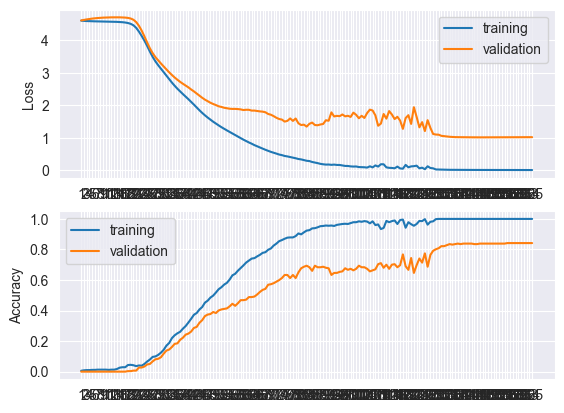

In [17]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)

### Data normalization

In [18]:
df_data.iloc[:,2:].max()

margin1      0.087891
margin2      0.205080
margin3      0.156250
margin4      0.169920
margin5      0.111330
               ...   
texture60    0.578130
texture61    0.151370
texture62    0.375980
texture63    0.086914
texture64    0.141600
Length: 192, dtype: float64

The data are not normalized, which can unfairly give more weight to some features than to others. To overcome this problem, we normalize our data using a min-max normalization.

In [19]:
X = ((df_data.iloc[:,2:] - df_data.iloc[:,2:].min()) / (df_data.iloc[:,2:].max() - df_data.iloc[:,2:].min())).values

species = df_data['species'].unique()

# Creation of the one-hot vector for the targets matrix
t = np.zeros((len(X),species.size)) 
for i in range(species.size):
    t[df_data['species'] == species[i], i] = 1
    
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [20]:
model.set_optimizer(optim='SGD', lr=1e-3, reg=1e-4)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59404, Accuracy: 1.59%
Epoch 2/500, Loss: 4.58943, Accuracy: 1.59%
Epoch 3/500, Loss: 4.58486, Accuracy: 1.30%
Epoch 4/500, Loss: 4.58013, Accuracy: 1.30%
Epoch 5/500, Loss: 4.57521, Accuracy: 1.30%
Epoch 6/500, Loss: 4.56984, Accuracy: 1.30%
Epoch 7/500, Loss: 4.56380, Accuracy: 1.30%
Epoch 8/500, Loss: 4.55690, Accuracy: 1.30%
Epoch 9/500, Loss: 4.54900, Accuracy: 1.59%
Epoch 10/500, Loss: 4.53980, Accuracy: 2.45%
Epoch 11/500, Loss: 4.52905, Accuracy: 2.60%
Epoch 12/500, Loss: 4.51644, Accuracy: 2.45%
Epoch 13/500, Loss: 4.50178, Accuracy: 2.02%
Epoch 14/500, Loss: 4.48495, Accuracy: 1.59%
Epoch 15/500, Loss: 4.46583, Accuracy: 1.44%
Epoch 16/500, Loss: 4.44416, Accuracy: 1.44%
Epoch 17/500, Loss: 4.41974, Accuracy: 1.44%
Epoch 18/500, Loss: 4.39211, Accuracy: 1.59%
Epoch 19/500, Loss: 4.36075, Accuracy: 1.88%
Epoch 20/500, Loss: 4.32530, Accuracy: 2.16%
Epoch 21/500, Loss: 4.28503, Accuracy: 2.74%
Epoch 22/500, Loss: 4.23904, Accuracy: 3.03%
Epoch 23/500, Loss:

In [21]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 92.93% on test data


The model accuracy is hugely improve with normalized data.

In [22]:
best_params_norm, accuracy_historic_norm = model.k_fold_cross_validation(X_train, t_train)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.424
K = 1, accuracy: 0.468
K = 2, accuracy: 0.288
K = 3, accuracy: 0.333
K = 4, accuracy: 0.362
Best val accuracy: 0.375 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.475
K = 1, accuracy: 0.381
K = 2, accuracy: 0.309
K = 3, accuracy: 0.348
K = 4, accuracy: 0.377
Best val accuracy: 0.378 | lr: 1e-04 | l2_reg: 1e-08
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.374
K = 1, accuracy: 0.396
K = 2, accuracy: 0.317
K = 3, accuracy: 0.275
K = 4, accuracy: 0.384
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.374
K = 1, accuracy: 0.374
K = 2, accuracy: 0.424
K = 3, accuracy: 0.355
K = 4, accuracy: 0.362
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.367
K = 1, accuracy: 0.460
K = 2, accuracy: 0.367
K = 3, accuracy: 0.4

<Axes: >

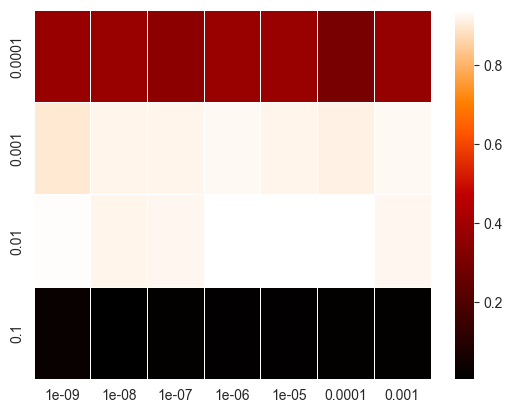

In [23]:
sns.heatmap(accuracy_historic_norm, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], 
                 yticklabels=[1e-4, 1e-3, 1e-2, 1e-1])

In [24]:
best_params_norm

(0.01, 1e-06)

### Complete learning with the best hyperparameters

In [25]:
model.set_optimizer(optim='SGD', lr=best_params_norm[0], reg=best_params_norm[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59397, Accuracy: 0.72%
Epoch 2/500, Loss: 4.49518, Accuracy: 1.88%
Epoch 3/500, Loss: 4.23505, Accuracy: 4.47%
Epoch 4/500, Loss: 3.78306, Accuracy: 9.09%
Epoch 5/500, Loss: 3.26484, Accuracy: 16.02%
Epoch 6/500, Loss: 2.56080, Accuracy: 29.00%
Epoch 7/500, Loss: 1.84981, Accuracy: 46.32%
Epoch 8/500, Loss: 1.29995, Accuracy: 60.17%
Epoch 9/500, Loss: 0.90370, Accuracy: 71.43%
Epoch 10/500, Loss: 0.61550, Accuracy: 80.66%
Epoch 11/500, Loss: 0.40915, Accuracy: 87.45%
Epoch 12/500, Loss: 0.30142, Accuracy: 92.64%
Epoch 13/500, Loss: 0.20085, Accuracy: 95.67%
Epoch 14/500, Loss: 0.14436, Accuracy: 97.11%
Epoch 15/500, Loss: 0.11752, Accuracy: 97.69%
Epoch 16/500, Loss: 0.18793, Accuracy: 95.67%
Epoch 17/500, Loss: 0.23679, Accuracy: 94.95%
Epoch 18/500, Loss: 0.09494, Accuracy: 98.70%
Epoch 19/500, Loss: 0.05967, Accuracy: 98.85%
Epoch 20/500, Loss: 0.06314, Accuracy: 98.85%
Epoch 21/500, Loss: 0.05202, Accuracy: 98.85%
Epoch 22/500, Loss: 0.03903, Accuracy: 99.13%
E

In [26]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 94.61% on test data


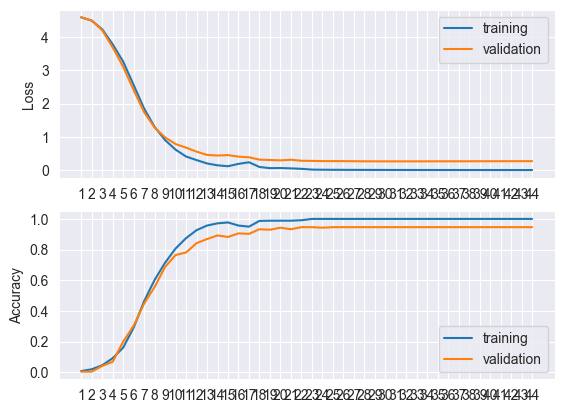

In [27]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)

### With activation function PReLU

In [28]:
model.set_model(input_size=X_train.shape[1], output_size=t_train.shape[1], activation_function='prelu')
model.set_optimizer(optim='SGD', lr=1e-3, reg=1e-4)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59968, Accuracy: 1.15%
Epoch 2/500, Loss: 4.59486, Accuracy: 1.59%
Epoch 3/500, Loss: 4.59023, Accuracy: 1.30%
Epoch 4/500, Loss: 4.58556, Accuracy: 2.60%
Epoch 5/500, Loss: 4.58069, Accuracy: 3.03%
Epoch 6/500, Loss: 4.57547, Accuracy: 2.60%
Epoch 7/500, Loss: 4.56977, Accuracy: 2.45%
Epoch 8/500, Loss: 4.56331, Accuracy: 2.89%
Epoch 9/500, Loss: 4.55587, Accuracy: 2.74%
Epoch 10/500, Loss: 4.54732, Accuracy: 2.74%
Epoch 11/500, Loss: 4.53731, Accuracy: 2.60%
Epoch 12/500, Loss: 4.52537, Accuracy: 2.74%
Epoch 13/500, Loss: 4.51081, Accuracy: 2.74%
Epoch 14/500, Loss: 4.49288, Accuracy: 2.89%
Epoch 15/500, Loss: 4.47095, Accuracy: 2.74%
Epoch 16/500, Loss: 4.44424, Accuracy: 2.89%
Epoch 17/500, Loss: 4.41150, Accuracy: 3.46%
Epoch 18/500, Loss: 4.37126, Accuracy: 3.17%
Epoch 19/500, Loss: 4.32040, Accuracy: 3.75%
Epoch 20/500, Loss: 4.25310, Accuracy: 4.91%
Epoch 21/500, Loss: 4.15666, Accuracy: 7.50%
Epoch 22/500, Loss: 3.99781, Accuracy: 11.54%
Epoch 23/500, Loss

In [29]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 95.29% on test data


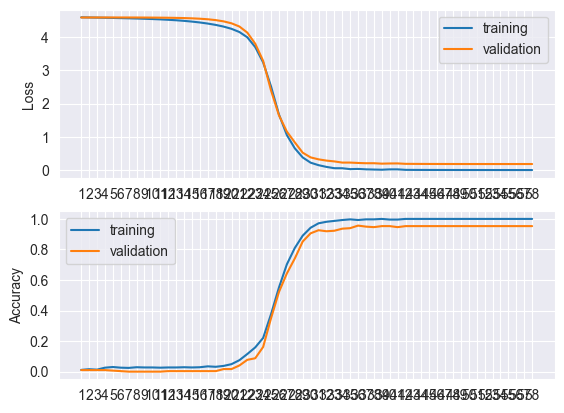

In [30]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)

### Hyperparameters optimization

In [31]:
best_params_prelu, accuracy_historic_prelu = model.k_fold_cross_validation(X_train, t_train)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.950
K = 1, accuracy: 0.935
K = 2, accuracy: 0.942
K = 3, accuracy: 0.935
K = 4, accuracy: 0.891
Best val accuracy: 0.931 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.899
K = 1, accuracy: 0.914
K = 2, accuracy: 0.914
K = 3, accuracy: 0.920
K = 4, accuracy: 0.971
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.928
K = 1, accuracy: 0.914
K = 2, accuracy: 0.935
K = 3, accuracy: 0.971
K = 4, accuracy: 0.920
Best val accuracy: 0.934 | lr: 1e-04 | l2_reg: 1e-07
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.892
K = 1, accuracy: 0.957
K = 2, accuracy: 0.964
K = 3, accuracy: 0.964
K = 4, accuracy: 0.942
Best val accuracy: 0.944 | lr: 1e-04 | l2_reg: 1e-06
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.942
K = 1, accura

<Axes: >

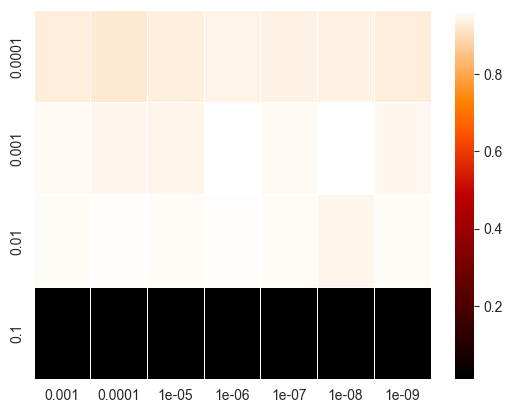

In [32]:
sns.heatmap(accuracy_historic_prelu, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], 
                 yticklabels=[1e-4, 1e-3, 1e-2, 1e-1])

In [33]:
best_params_prelu

(0.001, 1e-06)

### Complete learning with the best hyperparameters

In [37]:
model.set_optimizer(optim='SGD', lr=best_params_prelu[0], reg=best_params_prelu[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test, tol=1e-5)

Epoch 1/500, Loss: 4.59852, Accuracy: 1.30%
Epoch 2/500, Loss: 4.59387, Accuracy: 1.30%
Epoch 3/500, Loss: 4.58925, Accuracy: 1.30%
Epoch 4/500, Loss: 4.58467, Accuracy: 2.02%
Epoch 5/500, Loss: 4.57993, Accuracy: 2.45%
Epoch 6/500, Loss: 4.57490, Accuracy: 2.60%
Epoch 7/500, Loss: 4.56941, Accuracy: 2.74%
Epoch 8/500, Loss: 4.56327, Accuracy: 3.03%
Epoch 9/500, Loss: 4.55625, Accuracy: 3.17%
Epoch 10/500, Loss: 4.54804, Accuracy: 3.46%
Epoch 11/500, Loss: 4.53832, Accuracy: 3.90%
Epoch 12/500, Loss: 4.52679, Accuracy: 3.75%
Epoch 13/500, Loss: 4.51300, Accuracy: 3.17%
Epoch 14/500, Loss: 4.49643, Accuracy: 2.45%
Epoch 15/500, Loss: 4.47657, Accuracy: 2.16%
Epoch 16/500, Loss: 4.45308, Accuracy: 2.02%
Epoch 17/500, Loss: 4.42563, Accuracy: 2.31%
Epoch 18/500, Loss: 4.39364, Accuracy: 2.74%
Epoch 19/500, Loss: 4.35600, Accuracy: 4.47%
Epoch 20/500, Loss: 4.31089, Accuracy: 6.35%
Epoch 21/500, Loss: 4.25538, Accuracy: 8.66%
Epoch 22/500, Loss: 4.18332, Accuracy: 9.81%
Epoch 23/500, Loss:

In [38]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 94.28% on test data


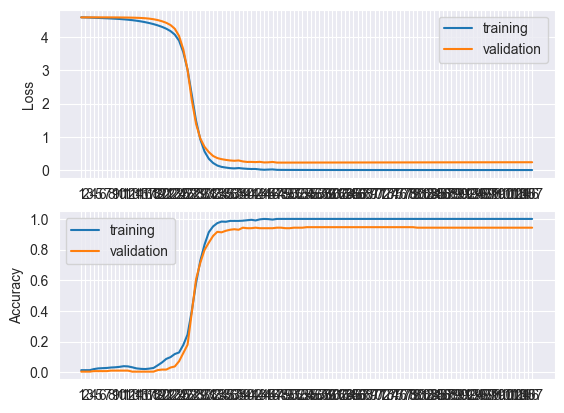

In [39]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)